In [1]:
import re
import pandas as pd

In [2]:
f= open('WhatsApp Chat with Aspiring Data Scientists🎯.txt','r',encoding='utf-8')

In [3]:
data=f.read()

In [4]:
print(data)

3/5/22, 19:42 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
2/12/22, 19:34 - +91 70085 32836 created group "Interview session (DS)"
3/5/22, 19:42 - You joined using this group's invite link
3/5/22, 19:43 - +91 87923 61180 joined using this group's invite link
3/5/22, 19:43 - +91 93461 61323 joined using this group's invite link
3/5/22, 19:43 - +91 96377 91709 joined using this group's invite link
3/5/22, 19:44 - +91 81697 80171 joined using this group's invite link
3/5/22, 19:45 - +91 98343 87923 joined using this group's invite link
3/5/22, 19:46 - +91 99021 82826 joined using this group's invite link
3/5/22, 19:48 - +91 97186 96596: hi
3/5/22, 19:48 - +91 6303 780 045: Hi
3/5/22, 19:49 - +91 97186 96596: are u getting anything ?
3/5/22, 19:49 - +91 97186 96596: he is writting anything ?
3/5/22, 19:49 - +91 97186 96596: i m not able to see anything
3/5/22, 19:49 - +91 87635 17704 joined usi

In [5]:
pattern='\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

In [6]:
messages=re.split(pattern,data)[1:]
messages

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 '+91 70085 32836 created group "Interview session (DS)"\n',
 "You joined using this group's invite link\n",
 "+91 87923 61180 joined using this group's invite link\n",
 "+91 93461 61323 joined using this group's invite link\n",
 "+91 96377 91709 joined using this group's invite link\n",
 "+91 81697 80171 joined using this group's invite link\n",
 "+91 98343 87923 joined using this group's invite link\n",
 "+91 99021 82826 joined using this group's invite link\n",
 '+91 97186 96596: hi\n',
 '+91 6303 780 045: Hi\n',
 '+91 97186 96596: are u getting anything ?\n',
 '+91 97186 96596: he is writting anything ?\n',
 '+91 97186 96596: i m not able to see anything\n',
 "+91 87635 17704 joined using this group's invite link\n",
 '+91 70835 99562: He is not sharing screen I guess\n',
 "+91 96401 99053 joined using this group's invite link\n",
 '+91 6

In [7]:
dates=re.findall(pattern,data)
dates

['3/5/22, 19:42 - ',
 '2/12/22, 19:34 - ',
 '3/5/22, 19:42 - ',
 '3/5/22, 19:43 - ',
 '3/5/22, 19:43 - ',
 '3/5/22, 19:43 - ',
 '3/5/22, 19:44 - ',
 '3/5/22, 19:45 - ',
 '3/5/22, 19:46 - ',
 '3/5/22, 19:48 - ',
 '3/5/22, 19:48 - ',
 '3/5/22, 19:49 - ',
 '3/5/22, 19:49 - ',
 '3/5/22, 19:49 - ',
 '3/5/22, 19:49 - ',
 '3/5/22, 19:50 - ',
 '3/5/22, 19:51 - ',
 '3/5/22, 19:51 - ',
 '3/5/22, 19:52 - ',
 '3/5/22, 19:52 - ',
 '3/5/22, 19:52 - ',
 '3/5/22, 19:52 - ',
 '3/5/22, 19:55 - ',
 '3/5/22, 19:58 - ',
 '3/5/22, 20:11 - ',
 '3/5/22, 20:18 - ',
 '3/5/22, 20:43 - ',
 '3/5/22, 21:01 - ',
 '3/5/22, 21:02 - ',
 '3/5/22, 21:04 - ',
 '3/5/22, 21:05 - ',
 '3/5/22, 21:06 - ',
 '3/5/22, 21:14 - ',
 '3/5/22, 21:14 - ',
 '3/5/22, 22:02 - ',
 '3/6/22, 15:13 - ',
 '3/6/22, 15:20 - ',
 '3/6/22, 15:21 - ',
 '3/6/22, 16:56 - ',
 '3/6/22, 16:56 - ',
 '3/6/22, 16:56 - ',
 '3/6/22, 17:54 - ',
 '3/8/22, 14:52 - ',
 '3/8/22, 15:08 - ',
 '3/8/22, 15:12 - ',
 '3/9/22, 19:02 - ',
 '3/9/22, 19:05 - ',
 '3/9/22, 19

In [8]:
df=pd.DataFrame({'user_message':messages,'message_date':dates})
# convert message_date type
df['message_date']=pd.to_datetime(df['message_date'],format='%m/%d/%y, %H:%M - ')

df.rename(columns={'message_date':'date'},inplace=True)
df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2022-03-05 19:42:00
1,"+91 70085 32836 created group ""Interview sessi...",2022-02-12 19:34:00
2,You joined using this group's invite link\n,2022-03-05 19:42:00
3,+91 87923 61180 joined using this group's invi...,2022-03-05 19:43:00
4,+91 93461 61323 joined using this group's invi...,2022-03-05 19:43:00


In [9]:
df.shape

(2333, 2)

In [10]:
# Separate users and  messages
users=[]
messages=[]
for message in df['user_message']:
    entry=re.split('([\w\W]+?):\s',message)
    if entry[1:]: #user name
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])
        
        
df['user'] = users
df['message']=messages
df.drop(columns=['user_message'],inplace=True)

df.head()

,date,user,message
0,2022-03-05 19:42:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2022-02-12 19:34:00,group_notification,"+91 70085 32836 created group ""Interview sessi..."
2,2022-03-05 19:42:00,group_notification,You joined using this group's invite link\n
3,2022-03-05 19:43:00,group_notification,+91 87923 61180 joined using this group's invi...
4,2022-03-05 19:43:00,group_notification,+91 93461 61323 joined using this group's invi...


In [11]:
df.head(50)

,date,user,message
0,2022-03-05 19:42:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2022-02-12 19:34:00,group_notification,"+91 70085 32836 created group ""Interview sessi..."
2,2022-03-05 19:42:00,group_notification,You joined using this group's invite link\n
3,2022-03-05 19:43:00,group_notification,+91 87923 61180 joined using this group's invi...
4,2022-03-05 19:43:00,group_notification,+91 93461 61323 joined using this group's invi...
5,2022-03-05 19:43:00,group_notification,+91 96377 91709 joined using this group's invi...
6,2022-03-05 19:44:00,group_notification,+91 81697 80171 joined using this group's invi...
7,2022-03-05 19:45:00,group_notification,+91 98343 87923 joined using this group's invi...
8,2022-03-05 19:46:00,group_notification,+91 99021 82826 joined using this group's invi...
9,2022-03-05 19:48:00,+91 97186 96596,hi\n


In [12]:
df['year']=df['date'].dt.year

In [13]:
df['month']=df['date'].dt.month_name()

In [14]:
df['day']=df['date'].dt.day

In [15]:
df['hour']=df['date'].dt.hour

In [16]:
df['minute']=df['date'].dt.minute

In [17]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2022-03-05 19:42:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022,March,5,19,42
1,2022-02-12 19:34:00,group_notification,"+91 70085 32836 created group ""Interview sessi...",2022,February,12,19,34
2,2022-03-05 19:42:00,group_notification,You joined using this group's invite link\n,2022,March,5,19,42
3,2022-03-05 19:43:00,group_notification,+91 87923 61180 joined using this group's invi...,2022,March,5,19,43
4,2022-03-05 19:43:00,group_notification,+91 93461 61323 joined using this group's invi...,2022,March,5,19,43


In [18]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2022-03-05 19:42:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022,March,5,19,42
1,2022-02-12 19:34:00,group_notification,"+91 70085 32836 created group ""Interview sessi...",2022,February,12,19,34
2,2022-03-05 19:42:00,group_notification,You joined using this group's invite link\n,2022,March,5,19,42
3,2022-03-05 19:43:00,group_notification,+91 87923 61180 joined using this group's invi...,2022,March,5,19,43
4,2022-03-05 19:43:00,group_notification,+91 93461 61323 joined using this group's invi...,2022,March,5,19,43


In [19]:
for message in df['message']:
    print(message.split())

['Messages', 'and', 'calls', 'are', 'end-to-end', 'encrypted.', 'No', 'one', 'outside', 'of', 'this', 'chat,', 'not', 'even', 'WhatsApp,', 'can', 'read', 'or', 'listen', 'to', 'them.', 'Tap', 'to', 'learn', 'more.']
['+91', '70085', '32836', 'created', 'group', '"Interview', 'session', '(DS)"']
['You', 'joined', 'using', 'this', "group's", 'invite', 'link']
['+91', '87923', '61180', 'joined', 'using', 'this', "group's", 'invite', 'link']
['+91', '93461', '61323', 'joined', 'using', 'this', "group's", 'invite', 'link']
['+91', '96377', '91709', 'joined', 'using', 'this', "group's", 'invite', 'link']
['+91', '81697', '80171', 'joined', 'using', 'this', "group's", 'invite', 'link']
['+91', '98343', '87923', 'joined', 'using', 'this', "group's", 'invite', 'link']
['+91', '99021', '82826', 'joined', 'using', 'this', "group's", 'invite', 'link']
['hi']
['Hi']
['are', 'u', 'getting', 'anything', '?']
['he', 'is', 'writting', 'anything', '?']
['i', 'm', 'not', 'able', 'to', 'see', 'anything']


In [20]:
words=[]
for message in df['message']:
    words.extend(message.split())

In [21]:
len(words)

15103

In [22]:
!pip install URLEXtract

In [23]:
from urlextract import URLExtract

extractor=URLExtract()
urls=extractor.find_urls("let's www.gmail.com have URL stackflow.com  as an example of google.com,https://facebook.com and we are having ftp://url.in")
urls

['www.gmail.com', 'stackflow.com', 'ftp://url.in']

In [24]:
links=[]

for message in df['message']:
    print(extractor.find_urls(message))

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['https://zoom.us/j/99765723475?pwd=RDZqNFMwR1MxdnJ5czJVT3F6bllGUT09']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['https://play.google.com/store/apps/details?id=com.ml.ai']
[]
['https://play.google.com/store/apps/details?id=com.rajendra.studydatascience']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['https://youtu.be/kXvmqg8hc70']
['https://medium.com/@vino24995/deployment-of-your-model-on-heroku-web-using-streamlit-library-e76f9c73ed86']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[

In [25]:
links=[]

for message in df['message']:
    links.extend(extractor.find_urls(message))

In [26]:
links

['https://zoom.us/j/99765723475?pwd=RDZqNFMwR1MxdnJ5czJVT3F6bllGUT09',
 'https://play.google.com/store/apps/details?id=com.ml.ai',
 'https://play.google.com/store/apps/details?id=com.rajendra.studydatascience',
 'https://youtu.be/kXvmqg8hc70',
 'https://medium.com/@vino24995/deployment-of-your-model-on-heroku-web-using-streamlit-library-e76f9c73ed86',
 'https://drive.google.com/drive/folders/1dp1YM1_RWYzOGz02bFav5C4vmopV8LuR',
 'https://github.com/suraj4502/Assignments-Excelr/tree/main',
 'errors.So',
 'https://jobs.cybertecz.in/myntra-off-campus-drive-2022-hiring-freshers-as-data-analysts-of-any-degree-graduate/',
 'https://analyticsindiamag.com/50-best-firms-in-india-for-data-scientists-to-work-for-2022/',
 'https://us06web.zoom.us/j/89899810313?pwd=MEtOaTc2amZhQ0JSQXpvYmY1UmFqUT09#success',
 'small.help',
 'https://theninehertz.com/web-stories/how-much-does-data-scientist-earn-around-the-world',
 'https://share.streamlit.io/suraj4502/co2_emission_prediction-project-/app.py',
 'https

In [27]:
len(links)

78

In [28]:
df

,date,user,message,year,month,day,hour,minute
0,2022-03-05 19:42:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022,March,5,19,42
1,2022-02-12 19:34:00,group_notification,"+91 70085 32836 created group ""Interview sessi...",2022,February,12,19,34
2,2022-03-05 19:42:00,group_notification,You joined using this group's invite link\n,2022,March,5,19,42
3,2022-03-05 19:43:00,group_notification,+91 87923 61180 joined using this group's invi...,2022,March,5,19,43
4,2022-03-05 19:43:00,group_notification,+91 93461 61323 joined using this group's invi...,2022,March,5,19,43
...,...,...,...,...,...,...,...,...
2328,2022-12-28 13:00:00,+91 96866 24666,Yeah\n,2022,December,28,13,0
2329,2022-12-28 14:57:00,+91 79773 40137,<Media omitted>\n,2022,December,28,14,57
2330,2022-12-28 15:41:00,+91 84850 50603,Before CREATE PROCEDURE Write DELIMITER //\nAn...,2022,December,28,15,41
2331,2022-12-28 15:41:00,+91 79773 40137,Yup got it thanks\n,2022,December,28,15,41


In [29]:
x=df['user'].value_counts().head()

In [30]:
import matplotlib.pyplot as plt

In [31]:
name = x.index
count=x.values

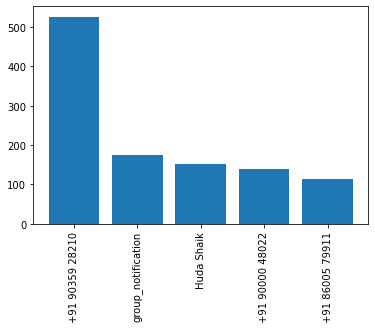

In [32]:
plt.bar(name,count)
plt.xticks(rotation="vertical")
plt.show()

In [33]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'index':"name",'user':'percent'})

,name,percent
0,+91 90359 28210,22.55
1,group_notification,7.46
2,Huda Shaik,6.47
3,+91 90000 48022,6.00
4,+91 86005 79911,4.89
...,...,...
93,+91 93267 81328,0.04
94,+91 90664 16224,0.04
95,+91 94816 08310,0.04
96,+91 97703 08955,0.04


In [34]:
# remove group notification
# remove media omitted message
# remove stop words

In [35]:
temp=df[df['user'] != 'group_notification']
temp=df[df['user'] != '<Media omitted>\n']

In [36]:
f=open('stop hinglish.txt','r')
stop_words=f.read()
print(stop_words)

.
..
...
?
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could
coul

In [37]:
words=[]

for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)

In [38]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,+91,181
1,<media,172
2,omitted>,172
3,data,107
4,code,96
5,learn,92
6,more.,88
7,tap,87
8,security,87
9,changed.,86


In [39]:
words=[]


for message in df['message']:
    words.extend(message.split())

In [40]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,to,362
1,the,307
2,+91,181
3,is,180
4,<Media,172
5,omitted>,172
6,in,158
7,I,156
8,for,151
9,of,146


In [41]:
!pip install emoji==1.7.0

In [42]:
import emoji         

In [43]:
emojis=[]
for message in df['message']:
    emojis.extend([c for c in message if c in emoji.UNICODE_EMOJI['en']])
  

In [44]:
emoji_df=pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

<BarContainer object of 5 artists>

C:\Users\gmpl\OneDrive\Documents\New Folder\New folder\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gmpl\OneDrive\Documents\New Folder\New folder\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127995 (\N{EMOJI MODIFIER FITZPATRICK TYPE-1-2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gmpl\OneDrive\Documents\New Folder\New folder\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128076 (\N{OK HAND SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


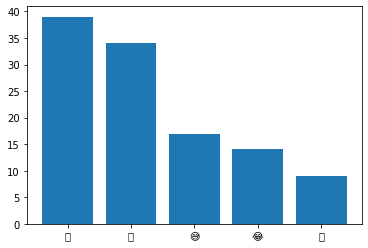

In [45]:
plt.bar(emoji_df[0].head(),emoji_df[1].head())

In [46]:
df['month_num']=df['date'].dt.month

In [47]:
timeline=df.groupby(['year','month_num','month']).count()['message'].reset_index()

In [48]:
timeline

,year,month_num,month,message
0,2022,2,February,1
1,2022,3,March,249
2,2022,4,April,242
3,2022,5,May,299
4,2022,6,June,203
5,2022,7,July,63
6,2022,8,August,338
7,2022,9,September,445
8,2022,10,October,282
9,2022,11,November,55


In [49]:
time=[]
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + "-"+ str(timeline['year'][i]))

In [50]:
timeline['time']=time

In [51]:
timeline

,year,month_num,month,message,time
0,2022,2,February,1,February-2022
1,2022,3,March,249,March-2022
2,2022,4,April,242,April-2022
3,2022,5,May,299,May-2022
4,2022,6,June,203,June-2022
5,2022,7,July,63,July-2022
6,2022,8,August,338,August-2022
7,2022,9,September,445,September-2022
8,2022,10,October,282,October-2022
9,2022,11,November,55,November-2022


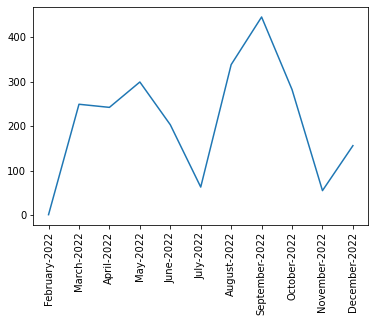

In [52]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation='vertical')
plt.show()

In [53]:
df['only_date']=df['date'].dt.date

In [54]:
daily_timeline=df.groupby('only_date').count()['message'].reset_index()

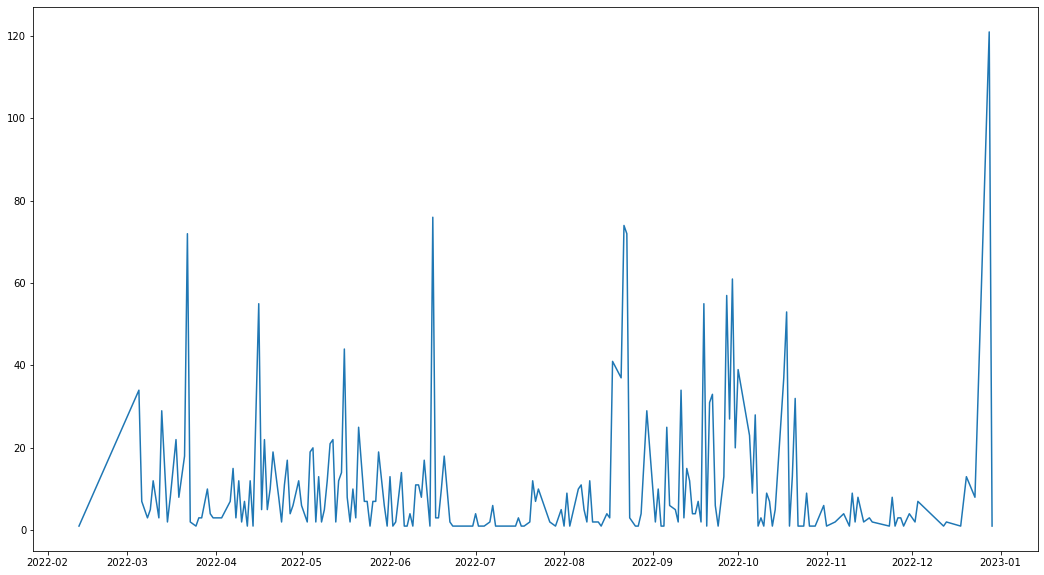

In [55]:
plt.figure(figsize=(18,10))
plt.plot(daily_timeline['only_date'],daily_timeline['message'])
plt.show()

In [56]:
df.head()

,date,user,message,year,month,day,hour,minute,month_num,only_date
0,2022-03-05 19:42:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022,March,5,19,42,3,2022-03-05
1,2022-02-12 19:34:00,group_notification,"+91 70085 32836 created group ""Interview sessi...",2022,February,12,19,34,2,2022-02-12
2,2022-03-05 19:42:00,group_notification,You joined using this group's invite link\n,2022,March,5,19,42,3,2022-03-05
3,2022-03-05 19:43:00,group_notification,+91 87923 61180 joined using this group's invi...,2022,March,5,19,43,3,2022-03-05
4,2022-03-05 19:43:00,group_notification,+91 93461 61323 joined using this group's invi...,2022,March,5,19,43,3,2022-03-05


In [57]:
df['day_name']=df['date'].dt.day_name()

In [58]:
df['day_name'].value_counts()

Tuesday      442
Thursday     405
Wednesday    380
Monday       364
Saturday     329
Sunday       216
Friday       197
Name: day_name, dtype: int64

In [59]:
period=[]
for hour in df[['day_name','hour']]['hour']:
    if hour == 23:
        period.append(str(hour) + "-"+ str('00'))
    elif hour ==0:
        period.append(str('00') + "-" + str(hour+1))
    else:
        period.append(str(hour) + "-"+ str(hour+1))

In [60]:
df['period']=period

In [61]:
df.sample(5)

,date,user,message,year,month,day,hour,minute,month_num,only_date,day_name,period
1366,2022-08-30 20:26:00,group_notification,Your security code with +91 99437 25967 change...,2022,August,30,20,26,8,2022-08-30,Tuesday,20-21
787,2022-05-30 13:06:00,+91 90359 28210,<Media omitted>\n,2022,May,30,13,6,5,2022-05-30,Monday,13-14
1711,2022-09-27 11:19:00,+91 90359 28210,I said like mobile .. But not..\n,2022,September,27,11,19,9,2022-09-27,Tuesday,11-12
1920,2022-10-07 17:04:00,+91 86005 79911,In the interview you require everything\n,2022,October,7,17,4,10,2022-10-07,Friday,17-18
1077,2022-08-05 23:39:00,+91 77768 88554,"My sales person is pavni mam,,, 6 month ago sh...",2022,August,5,23,39,8,2022-08-05,Friday,23-00


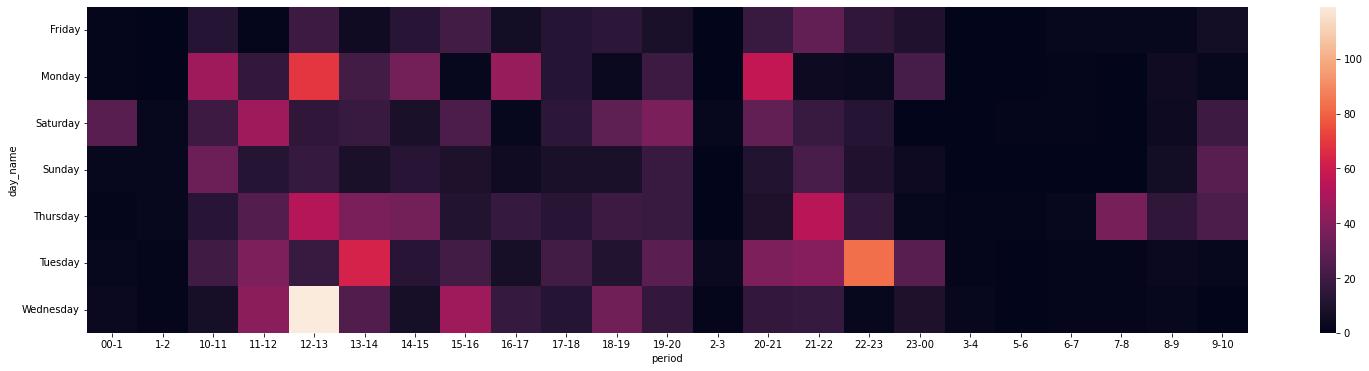

In [62]:
import seaborn as sns
plt.figure(figsize=(26,6))
sns.heatmap(df.pivot_table(index='day_name',columns='period',values='message',aggfunc='count').fillna(0))
plt.yticks(rotation='horizontal')
plt.show()